<a href="https://colab.research.google.com/github/roguesoul18/MNIST-CNN/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST-Classification**

This is Convolutional Neural Network(CNN) modeled to train on the MNIST dataset. Firstly, we will import all the necessary libraries required for this project. This model has been written using the PyTorch framework.

**Note:- A lot of transformations and computations in this code has been written by keeping in mind that they will be carried out on a GPU. Further explanation on this is provided in sections below.
Kindly choose a GPU runtime before proceeding!.**

In [ ]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

In this section, we will download the MNIST dataset. The `MNIST` function from the `torchvision.datatset` library is used for downloading this dataset.

# **What is `MNIST`?**
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

# **What does it consist of?**
The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.

(from-[wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database))


In [ ]:
dataset = MNIST(root='data/', download=True)
test_dataset = MNIST(root='data/', train=False)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Then we will load the dataset into `dataset` variable and we will use `transforms.ToTensor()` to convert each pixel of the image to a pytorch compatible tensor. Every pixel has a colour value in the range of 0 to 255. Dividing it by 255 gives a number between 0 and 1 which helps in creating an array of tensors for further computations. 

In [ ]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())
img_tensor, label = dataset[0]

We will now print the 0th element of the dataset along with its label. As expected, we obtain an array of tensors and an integer label.

In [ ]:
img, label = dataset[0]
print(img.shape, label)
img.cuda()

torch.Size([1, 28, 28]) 5


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

This block gives the classes of the dataset viz. Integers from 0 to 9 followed by there literal name.

In [ ]:
print(dataset.classes)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


Completely reproducible results are not guaranteed across PyTorch releases, individual commits, or different platforms. Furthermore, results may not be reproducible between CPU and GPU executions, even when using identical seeds.

However, there are some steps you can take to limit the number of sources of nondeterministic behavior for a specific platform, device, and PyTorch release. First, you can control sources of randomness that can cause multiple executions of your application to behave differently. Second, you can configure PyTorch to avoid using nondeterministic algorithms for some operations, so that multiple calls to those operations, given the same inputs, will produce the same result.

One of the methods is to set a `random_seed` and call `torch.manual_seed`.
This returns a torch Generator object or 'specific random number' which becomes the starting point for all other random calls in further operations thus eliminating non-deterministic results.

In [ ]:
random_seed = 42
torch.manual_seed(random_seed);

Now we will split the dataset into two parts-Training and Validation. It's self-explanatory what each part will be used for. 

In [ ]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In this block, we allocate how many images are to be processed in each computation on the gpu.

In [ ]:
batch_size=128
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


The following section contains a simple function `show_batch` which shows a sample 16x8 grid of the handwritten digits from the dataset. 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


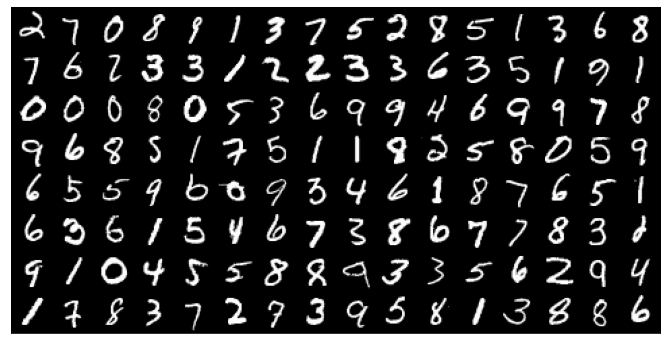

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break
show_batch(train_dl)

# **The Model**
Now we come to main building block of this project-the network that we will be using. To start of, this class seems to contain functions that house tons of mathematical functions. They are explained below-

1.   The first step comprises of the first convolutional layer. The `nn.Conv2d` applies a 2D convolution over an input signal composed of several input planes.
2.   Another layer is applied in the next line.
3.   The `nn.Dropout2d` call zeroes out the probability of random channels independently. The algorithm followed is utilisation of random samples from a Bernoulli distribution in order to introduce randomness.
4.   `nn.Linear` is probably the most important out of all these as this applies a linear transformation to the incoming data from previous layer by transposing the array, multiplying a weight and adding a bias. This is the basis of any sort transformation in a model.



In the `forward` function, we define few mathematical function calls that are important from the perspective of machine learning itself.
 

1.   `relu`-Short for rectified linear unit. This is a function that returns y=0 for x<0 and y=x for x>=0. This is used for introducing non-linearity in the input data which makes it useful for further computation.
2.   `max_pool2d` essentially scales down the matrix py applying a max pool layer on it.




In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.cuda()
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

# **Explanation of CNN**
The 2D convolution is a fairly simple operation at heart: you start with a kernel, which is simply a small matrix of weights. This kernel “slides” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel.

Source-[More about CNN->](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)

In [ ]:
model = Net().cuda()

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([128, 1, 28, 28])
out.shape: torch.Size([128, 10])
out[0]: tensor([-2.3515, -2.5005, -2.2598, -2.1254, -2.3101, -2.2216, -2.2825, -2.2222,
        -2.4861, -2.3263], device='cuda:0', grad_fn=<SelectBackward>)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


# **Use of GPU**
GPUs are widely utilised in machine learning and deep learning operations. GPUs are designed predominantly for graphics processing, at the heart of which lies matrix transformations. GPUs consists of multiple cores, opposed to CPUs which only have 2/4/6/8/12 at max. This greatly speeds up the matrix tranformations as the data jobs are distributed efficiently on the numerous cores.

Keeping this in mind and as mentioned earlier, this model is written in order to exploit the computing edge that a GPU has.

A lot of `.cuda()` commands can be seen in this model which essentially instructs the code to transfer the data tensors to the GPU in utilisation

`get_default_device()` is a simple function that helps in identifying the runtime currently in utilisation. 

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        model.cuda()
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);


Here we define some parameters for the network. Epochs is the number of times the training cycles will run. Learning rate is indicative of how precise the descent is on a surface of a graph.

In [ ]:
n_epochs = 10
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.75
log_interval = 10
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                momentum=momentum)

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_ds) for i in range(n_epochs + 1)]

In [ ]:
examples = enumerate(val_dl)
batch_idx, (example_data, example_targets) = next(examples)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
def train(epoch):#training functiion
  network.train()
  for batch_idx, (data, target) in enumerate(train_dl):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_ds),
        100. * batch_idx / len(train_dl), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_ds)))

In [ ]:
def test():#test function
  network.eval().cuda()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in val_dl:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(val_ds)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
    test_loss, correct, len(val_ds),
    float(100. * correct / len(val_ds))))

Running the test function, it can be seen we obtain an accuracy of almost 97%.

In [ ]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3059, Accuracy: 916/10000 (9.16%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.297681
Train Epoch: 1 [1280/50000 (3%)]	Loss: 2.320287
Train Epoch: 1 [2560/50000 (5%)]	Loss: 2.305424
Train Epoch: 1 [3840/50000 (8%)]	Loss: 2.295323
Train Epoch: 1 [5120/50000 (10%)]	Loss: 2.299852
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.297405
Train Epoch: 1 [7680/50000 (15%)]	Loss: 2.301705
Train Epoch: 1 [8960/50000 (18%)]	Loss: 2.291392
Train Epoch: 1 [10240/50000 (20%)]	Loss: 2.282737
Train Epoch: 1 [11520/50000 (23%)]	Loss: 2.284652
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.284365
Train Epoch: 1 [14080/50000 (28%)]	Loss: 2.266174
Train Epoch: 1 [15360/50000 (31%)]	Loss: 2.228315
Train Epoch: 1 [16640/50000 (33%)]	Loss: 2.217609
Train Epoch: 1 [17920/50000 (36%)]	Loss: 2.204439
Train Epoch: 1 [19200/50000 (38%)]	Loss: 2.136221
Train Epoch: 1 [20480/50000 (41%)]	Loss: 2.079793
Train Epoch: 1 [21760/50000 (43%)]	Loss: 2.072571
Train Epoch: 1 [23040/50000 (46%)]	Loss: 1.940322
Train 

The loss vs number of examples trained can be seen in the below graph.

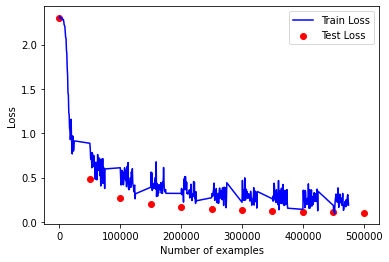

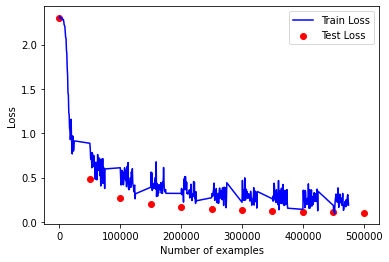

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('Number of examples')
plt.ylabel('Loss')
fig

In [ ]:
with torch.no_grad():
  output = network(example_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Finally, we use few matplotlib functions to display random members of the data and then we use our model to predict the number. As it is visible, we obtain pretty good results.

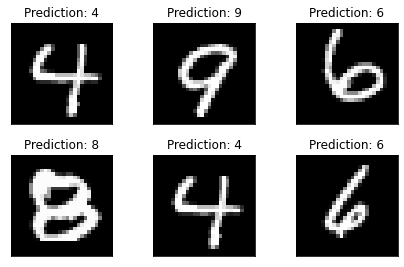

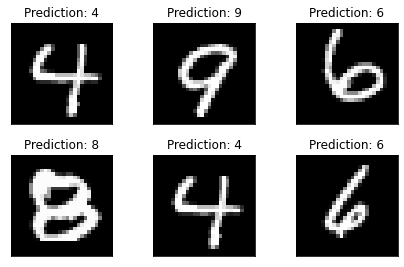

In [ ]:
import random
fig = plt.figure()
for i in range(6):
  j = random.randint(0,255)
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[j][0].cpu(), cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][j].item()))
  plt.xticks([])
  plt.yticks([])
fig